## **Air bnb Booking Analysis - EDA (Exploratory Data Analysis)**

## **Dataset Description**

**Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.**

* **This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.**

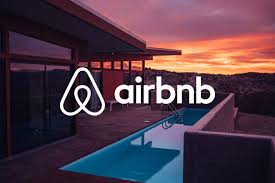

**Dataset Information**

* **Number of instances:** 48895

* **Number of attributes:** 16

* The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

* This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

* This dataset contains information about Airbnb bookings in New York City in 2019. By analyzing this data, you may be able to understand the trends and patterns of Airbnb use in the NYC.



## **1. Importing Libraries**





In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Read the CSV file
df = pd.read_csv(r"/content/sample_data/AB_NYC_2019.csv")

In [18]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## **Exploring Dataset**

In [7]:
df.shape

(48895, 16)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [20]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [21]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [22]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **1. Data Cleaning**

In [23]:
df.isna().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


## **2. Drop Duplicates**

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.dropna(subset=['host_name','name'], inplace=True)

In [26]:
df['reviews_per_month'].fillna(df['reviews_per_month'].median(),inplace=True)
#Median Imputation Techniques used for reviews_per_month column
df['last_review'].fillna(df['last_review'].mode().values[0],inplace=True)

In [27]:
df['last_review'] = pd.to_datetime(df['last_review']) #.dt.date

In [28]:
df.drop(columns=['id'], axis=1, inplace=True)

In [29]:
df['host_id'] = df['host_id'].astype('object')

## **3. Univariate Analysis**

In [31]:
#Getting numeric columns
numerics = ['int32', 'int64', 'float64']
numer_col=list(df.select_dtypes(include=numerics).columns)
#We don't include Latitude and Longitude because they are geographical data
numer_col=[i for i in numer_col if i not in ['latitude','longitude']]

In [32]:
numer_col

['price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

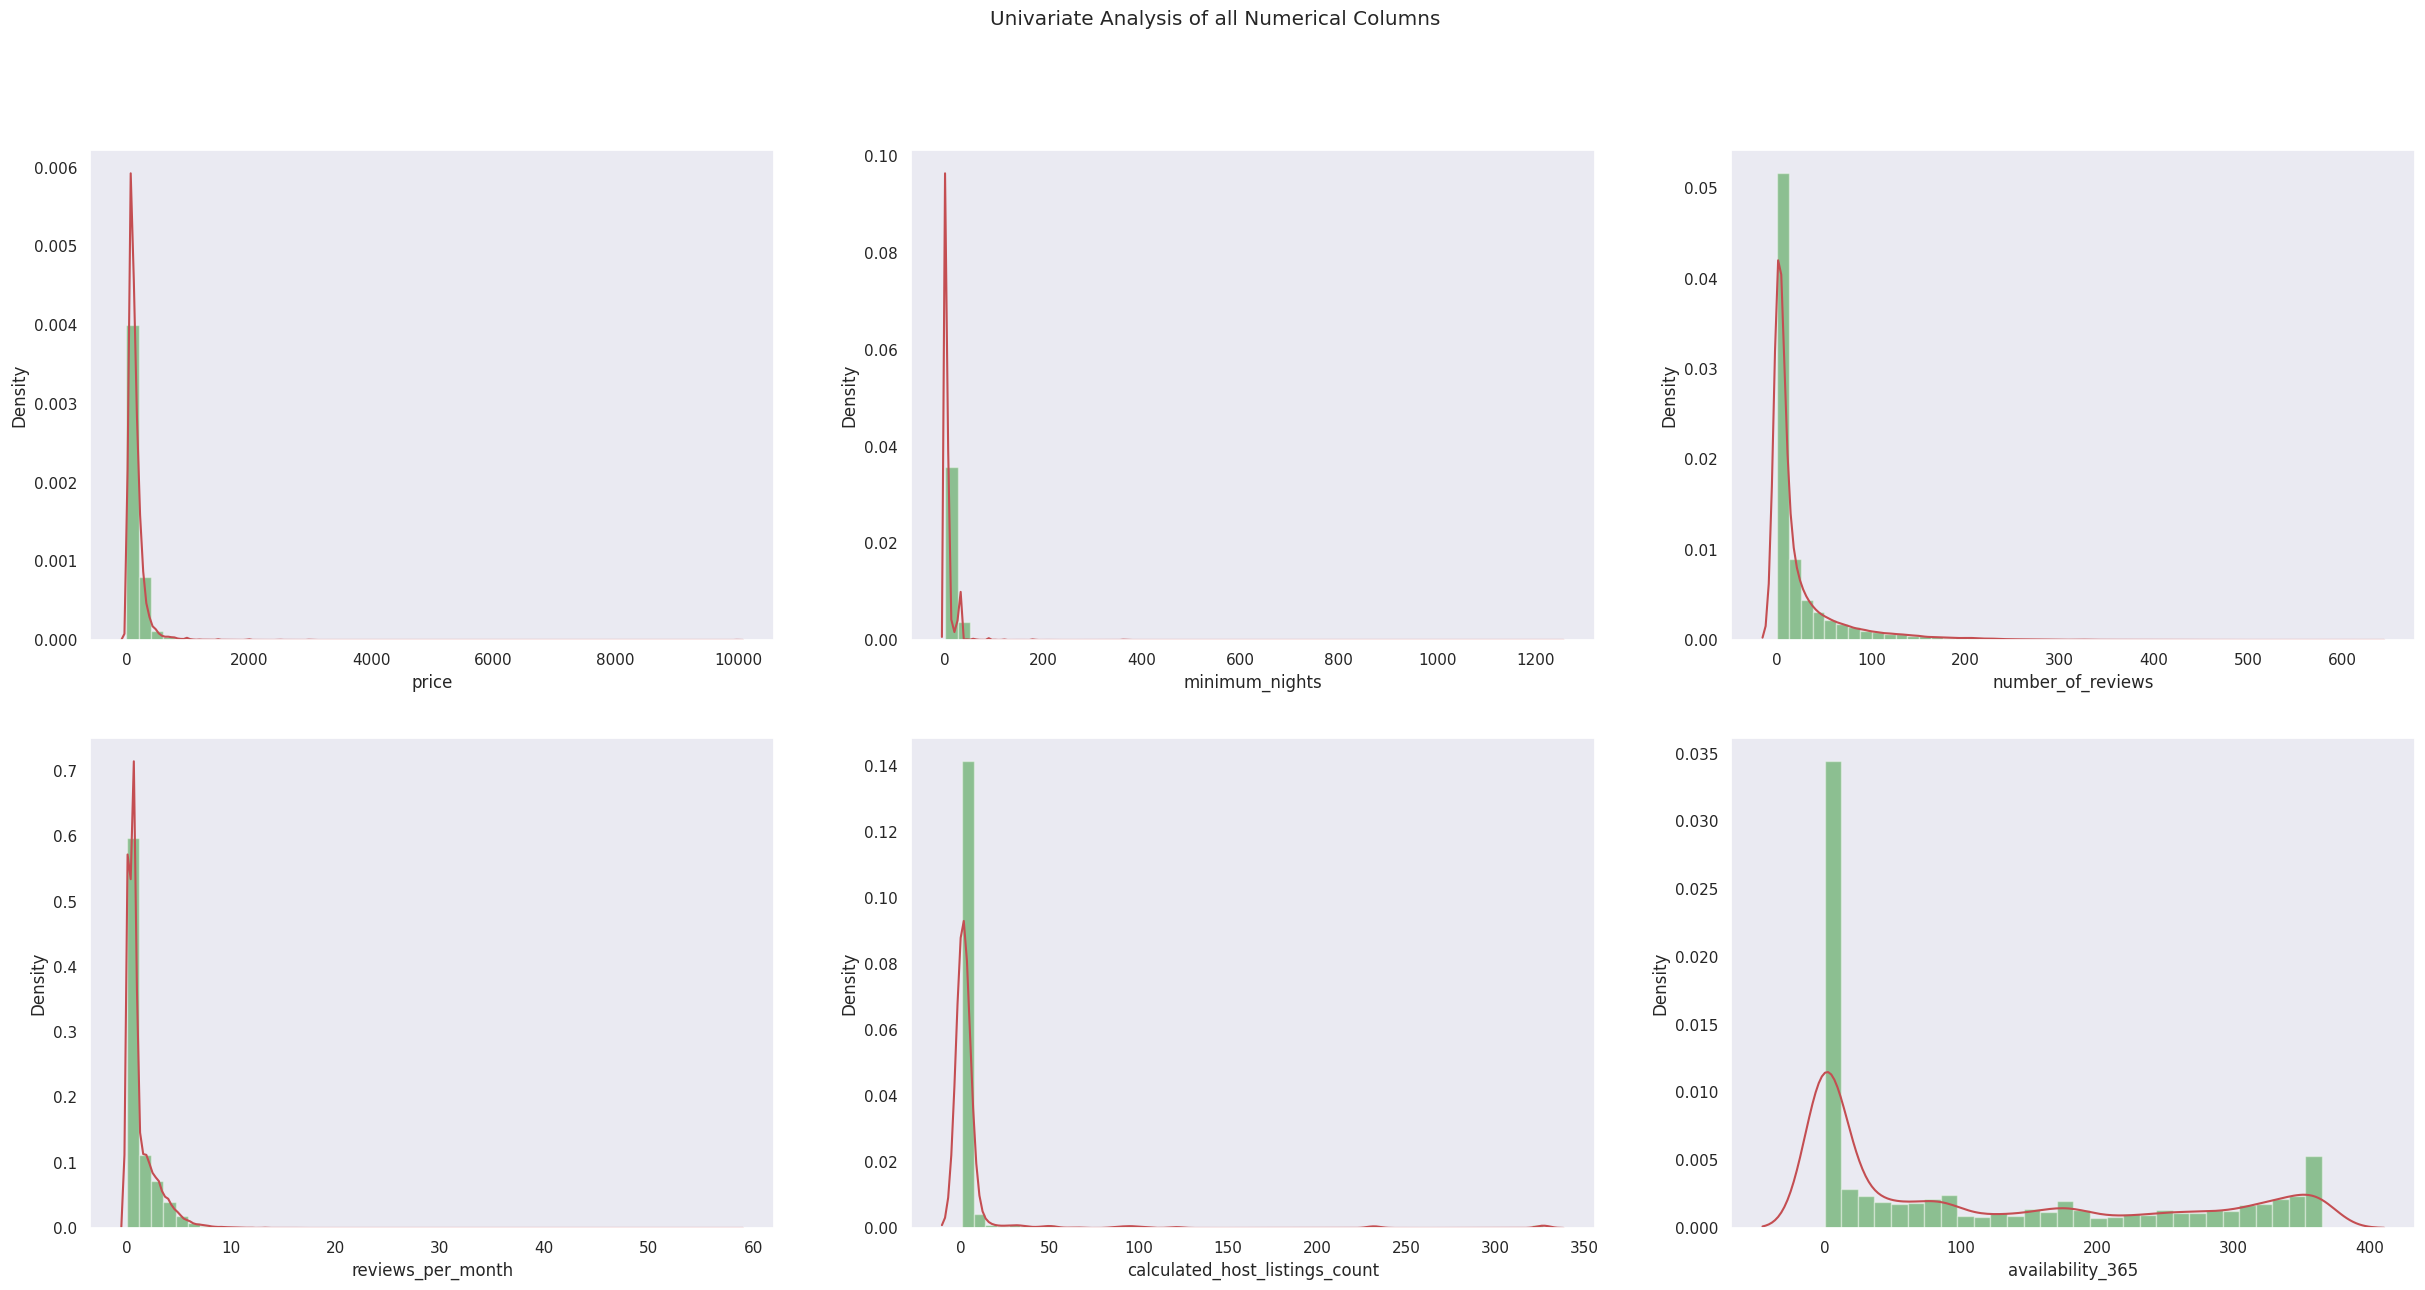

In [35]:
#Background Style
sns.set_theme('notebook', style='dark')
# plt.style.use("white_background")

#creating subplots
fig, ax =plt.subplots(2,3,figsize=(30,14))

#setting a title of enitre graph
fig.suptitle('Univariate Analysis of all Numerical Columns')
ind,ind1=0,0
axis=0
for i in numer_col:
  if ind<3:
    #plotting graphs for first axis(row)
    sns.distplot(df[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind])
    ind=ind+1
  elif ind>=3:
    axis=1
    #plotting graphs for second axis(row)
    sns.distplot(df[i],kde=True,color='green',kde_kws={'color':'r'},ax=ax[axis][ind1])
    ind1=ind1+1
#show figure
fig.show()

**From above plots all have these Characteristics**

1. Deviate from the normal distribution.

2. It has a positive skewness.

3. High peakedness.

## **4. Bivariate Analysis or Relationship of Numerical Features**

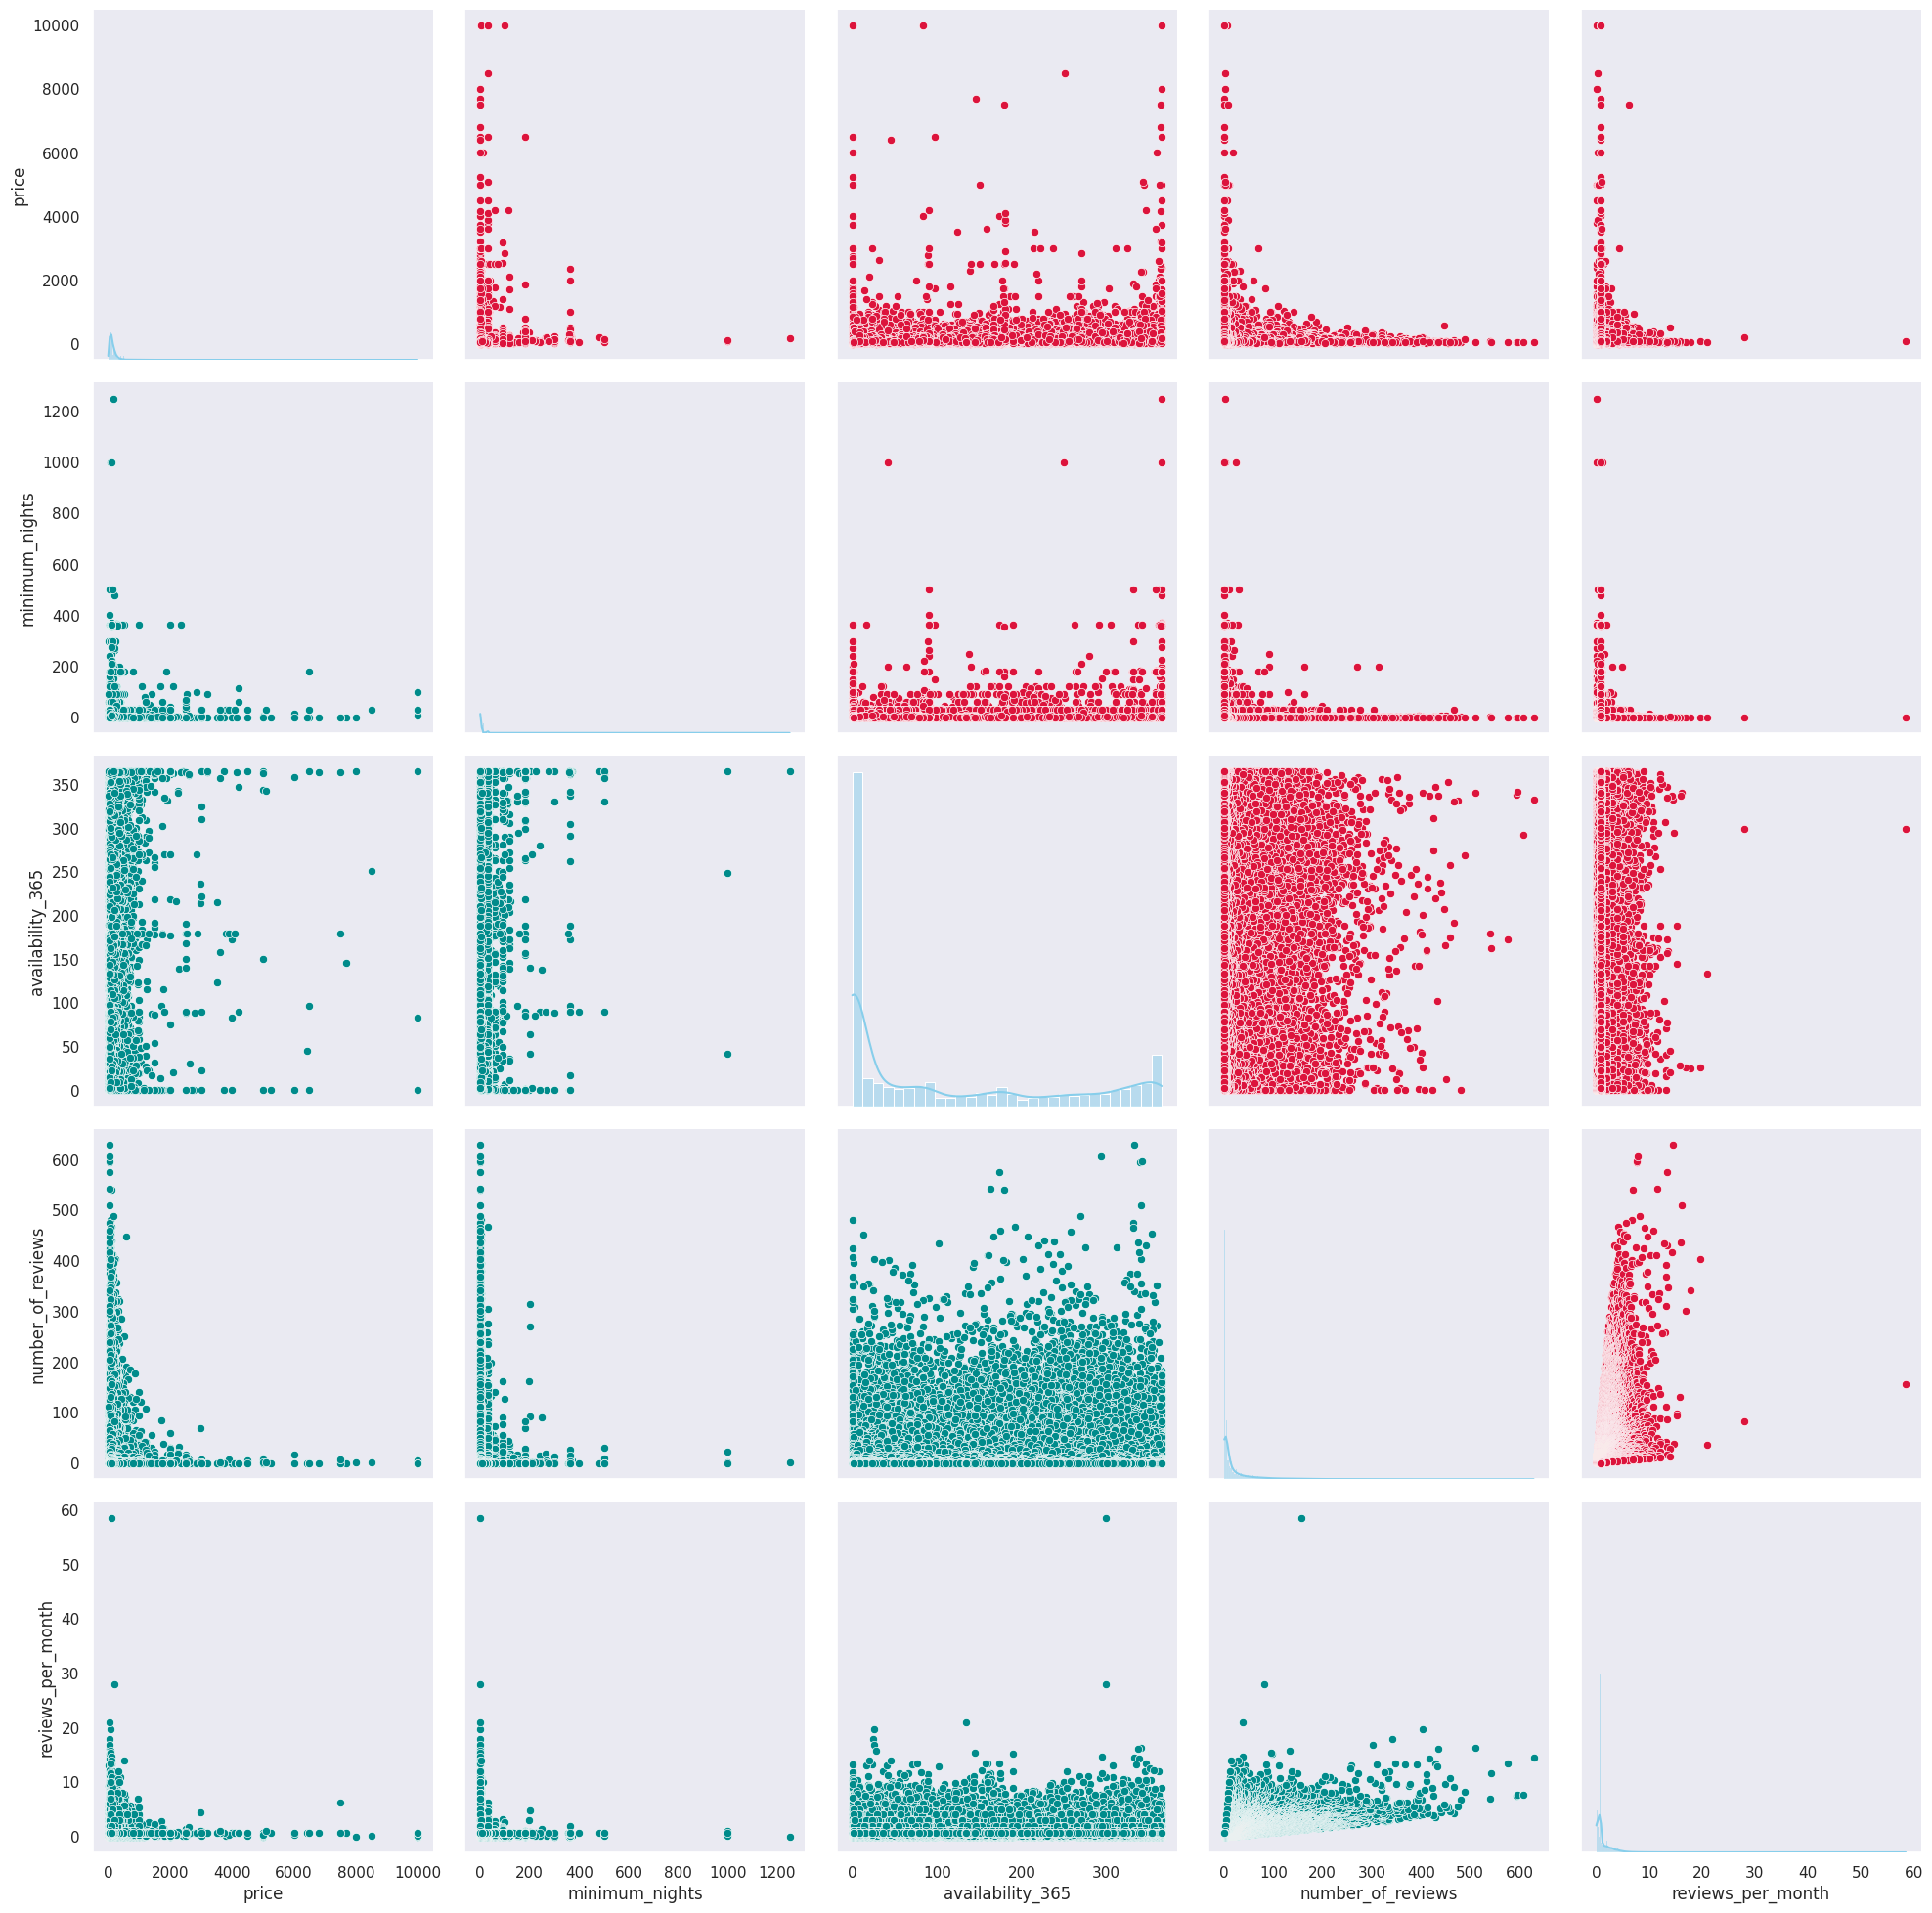

In [37]:
# Define your variable list
vars_to_plot = ['price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'reviews_per_month']

# Clean NaNs to prevent issues
df_clean = df[vars_to_plot].dropna()

# Plotting
g = sns.PairGrid(df_clean, vars=vars_to_plot, height=4)
g.map_upper(sns.scatterplot, color='crimson')
g.map_lower(sns.scatterplot, color='darkcyan')
g.map_diag(sns.histplot, kde=True, color='skyblue')

plt.show()


## **5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

*   The dataset is now ready to be explored. We will be doing some univariate, bivariate and multivariate analysis to find out interesting insights.

*   We will uncover few insights from the dataset like:
    * Which hosts has got the most listings in NYC?
    * Which hosts are the busiest?
    * Which neighbourhood group has the most listings in NYC?
    * Which neighbourhood group and neighbourhood are the most expensive and the most affordable?
    * Different room types available in different neighbourhood groups.
    * Which neighbourhood group or neighbourhood is more available out of 365 days?
    * Cost of each room type present in NYC.

    and many more.

### **5.1. What is the range of prices of the Airbnb listings in NYC?**

<Figure size 2000x1200 with 0 Axes>

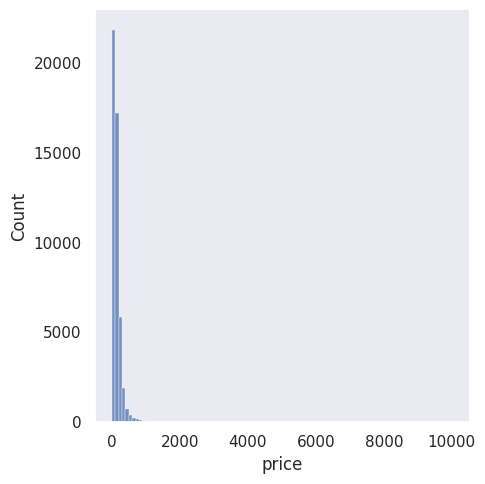

In [38]:
# check the distribution of price
plt.figure(figsize=(20,12))
sns.displot(df['price'],bins=100)
plt.show()

**1. Why was this chart selected?**

This chart was chosen to analyze the distribution of listing prices across New York City. It helps visualize how prices are spread and identify typical price ranges

**2. What insights were derived from the chart?**

The distribution is highly skewed, with the majority of listings priced between $10 and $200.
There are a few entries with significantly higher prices (up to $10,000), often associated with unusually high minimum night requirements. These data points, while extreme, are not treated as outliers due to their contextual relevance.

**3. Can these insights support business decisions?**

Yes, the insights provide a clear view of typical pricing behavior, which is valuable for setting competitive prices, identifying potential pricing anomalies, and understanding customer expectations—all of which can contribute to more informed and impactful business strategies.

### **5.2. How many unique Airbnb hosts are there in NYC?**

In [39]:
# find unique hosts
df[['host_id']].nunique()

,0
host_id,37425


* There are 37455 unique Airbnb hosts in New York City.

* It is clear with the count of hosts and properties listed that there are hosts who have multiple properties listed in Airbnb NYC.

### **5.3. Who are the hosts with the most multiple property listings in Airbnb NYC?**

The top 10 hosts with the most property listings in NYC are:

+----+-----------+-------------------+---------------+
|    |  Host ID  |     Host Name     | Listing Count |
+----+-----------+-------------------+---------------+
| 0  | 219517861 |   Sonder (NYC)    |      327      |
| 1  | 107434423 |    Blueground     |      232      |
| 2  | 30283594  |       Kara        |      121      |
| 3  | 137358866 |      Kazuya       |      103      |
| 4  | 12243051  |      Sonder       |      96       |
| 5  | 16098958  |  Jeremy & Laura   |      96       |
| 6  | 61391963  | Corporate Housing |      91       |
| 7  | 22541573  |        Ken        |      87       |
| 8  | 200380610 |      Pranjal      |      65       |
| 9  |  1475015  |       Mike        |      52       |
| 10 |  7503643  |       Vida        |      52       |
| 11 | 120762452 |      Stanley      |      50       |
| 12 |  2856748  |       Ruchi       |      49       |
| 13 | 205031545 |    Red Awning     |      49       |
| 1

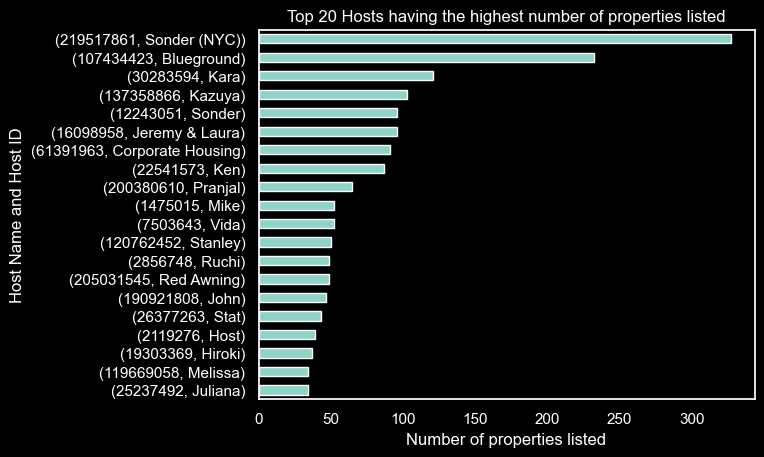

In [ ]:
# top 10 hosts on the basis of count of listings

top_hosts_listings = df.groupby(['host_id','host_name'])['host_id'].count().sort_values(ascending=False)[:20]
print('The top 10 hosts with the most property listings in NYC are:\n')
top_hosts_listings_df = top_hosts_listings.reset_index(name='Listing Count')
table = tabulate(top_hosts_listings_df, headers=['Host ID', 'Host Name', 'Listing Count'], tablefmt='pretty', showindex=True, numalign="right")
print(table)


# plot the top 10 hosts on the basis of count of listings
top_hosts_listings.plot.barh().invert_yaxis()
plt.xlabel('Number of properties listed')
plt.ylabel('Host Name and Host ID')
plt.title('Top 20 Hosts having the highest number of properties listed')
plt.show()

1. Why did you choose this specific chart?

   We chose a bar plot to represent the most popular hosts, as the data is categorical in nature. This type of visualization is effective for comparing the number of properties listed by each host.

2. What insights were gained from the chart?

   The chart reveals that several hosts have more than 100 properties listed on Airbnb in NYC.

3. Will the insights gained help create a positive business impact?

   Yes. The chart highlights that "Sonder (NYC)" has the highest number of properties listed, with a total of 327. Recognizing hosts with 50 or more listings through an official badge could serve as both a form of appreciation and a trust signal for guests, helping them identify reputable and popular hosts.

### **5.4. Who are the hosts with the most number of reviews?**

The top 10 hosts who has got the most number of reviews:

╒════╤═══════════╤════════════════════════════════╤════════════════╕
│    │   Host ID │ Host Name                      │   Review Count │
╞════╪═══════════╪════════════════════════════════╪════════════════╡
│  0 │  37312959 │ Maya                           │           2273 │
├────┼───────────┼────────────────────────────────┼────────────────┤
│  1 │    344035 │ Brooklyn&   Breakfast    -Len- │           2205 │
├────┼───────────┼────────────────────────────────┼────────────────┤
│  2 │  26432133 │ Danielle                       │           2017 │
├────┼───────────┼────────────────────────────────┼────────────────┤
│  3 │  35524316 │ Yasu & Akiko                   │           1971 │
├────┼───────────┼────────────────────────────────┼────────────────┤
│  4 │  40176101 │ Brady                          │           1818 │
├────┼───────────┼────────────────────────────────┼────────────────┤
│  5 │   4734398 │ Jj                        

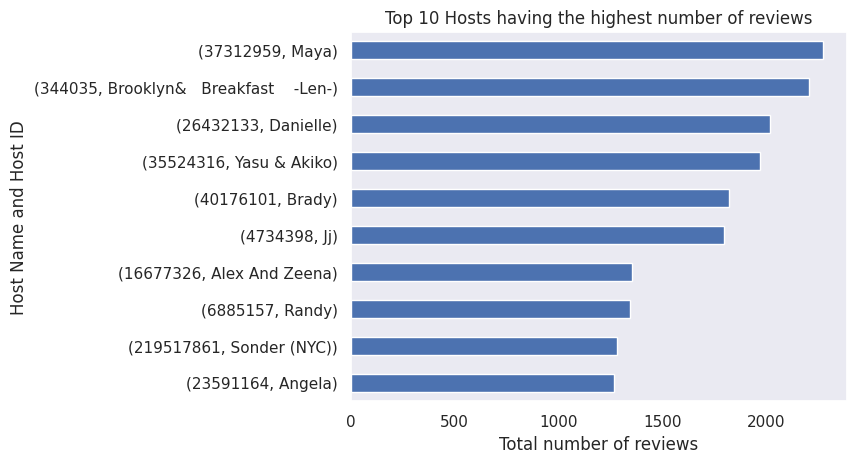

In [40]:
# top 10 hosts on the basis of reviews
top_hosts_reviews = df.groupby(['host_id','host_name'])['number_of_reviews'].sum().sort_values(ascending=False)[:10]
print('The top 10 hosts who has got the most number of reviews:\n')
top_hosts_reviews_df = top_hosts_reviews.reset_index(name='review_count')
table = tabulate(top_hosts_reviews_df, headers=['Host ID','Host Name','Review Count'],tablefmt='fancy_grid')
print(table)

# plot the top 10 hosts on the basis of reviews
top_hosts_reviews.plot.barh().invert_yaxis()
plt.ylabel('Host Name and Host ID')
plt.xlabel('Total number of reviews')
plt.title('Top 10 Hosts having the highest number of reviews')
plt.show()

1. Why did you choose this specific chart?

   We chose a bar plot to identify the most popular hosts based on the number of reviews, as this is categorical data. A bar plot is effective for comparing review counts across different hosts.

2. What insights were gained from the chart?

   The chart highlights the top 10 hosts who have received the highest number of reviews on Airbnb.

3. Will the insights gained help create a positive business impact?

   Yes. A high number of reviews often reflects strong customer satisfaction and a positive guest experience. These insights can help promote hosts with strong reputations, encourage high service standards, attract more guests, and ultimately contribute to increased revenue.

### **5.5 Which is the most affordable borough?**

The most affordable borough in NYC:

+----+-----------------------+---------+
|    | Neighbourhood Group   |   Price |
+====+=======================+=========+
|  0 | Manhattan             |     150 |
+----+-----------------------+---------+
|  1 | Brooklyn              |      90 |
+----+-----------------------+---------+
|  2 | Queens                |      75 |
+----+-----------------------+---------+
|  3 | Staten Island         |      75 |
+----+-----------------------+---------+
|  4 | Bronx                 |      65 |
+----+-----------------------+---------+


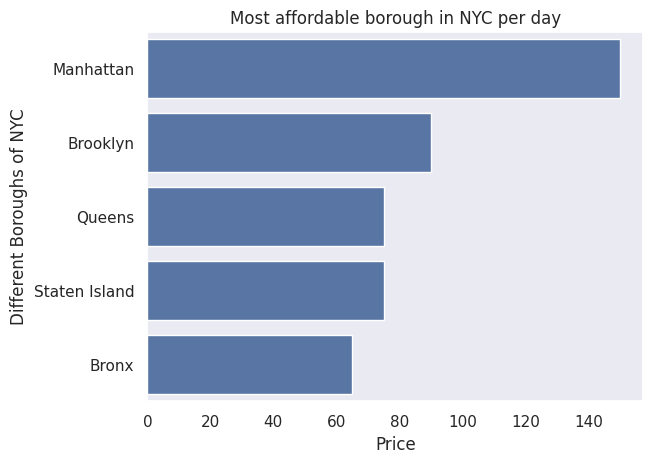

In [41]:
# Most affordable borough per day
most_affordable_borough = df.groupby('neighbourhood_group')['price'].median().sort_values(ascending=False).reset_index()
print("The most affordable borough in NYC:\n")
table = tabulate(most_affordable_borough,headers=['Neighbourhood Group','Price'],tablefmt='grid')
print(table)

# Plotting the most affordable borough per day
sns.barplot(x='price',y='neighbourhood_group', data=most_affordable_borough)
plt.xlabel("Price")
plt.ylabel("Different Boroughs of NYC")
plt.title("Most affordable borough in NYC per day")
plt.show()



1. Why did you pick the specific chart?

* The specific chart is chosen to compare the categorical and numerical data i.e. providing insights about the most affordable price in the boroughs of NYC.

2. What is/are the insight(s) found from the chart?

* It shows which borough is the most affordable amongst the five in NYC.

3. Will the gained insights help creating a positive business impact?

* The chart can be useful for business undertanding of the most affordable borough and potentially target their marketing and pricing strategies accordingly.


### **5.6. What are the different types of room available in the properties in NYC?**

The different room types available in different neighbourhood groups: 

+----+---------------------+-----------------+-------+
|    | Neighbourhood Group |    Room Type    | Count |
+----+---------------------+-----------------+-------+
| 0  |        Bronx        | Entire home/apt |  378  |
| 1  |        Bronx        |  Private room   |  652  |
| 2  |        Bronx        |   Shared room   |  59   |
| 3  |      Brooklyn       | Entire home/apt | 9553  |
| 4  |      Brooklyn       |  Private room   | 10123 |
| 5  |      Brooklyn       |   Shared room   |  413  |
| 6  |      Manhattan      | Entire home/apt | 13190 |
| 7  |      Manhattan      |  Private room   | 7973  |
| 8  |      Manhattan      |   Shared room   |  480  |
| 9  |       Queens        | Entire home/apt | 2096  |
| 10 |       Queens        |  Private room   | 3370  |
| 11 |       Queens        |   Shared room   |  198  |
| 12 |    Staten Island    | Entire home/apt |  176  |
| 13 |    Staten Island    |  Private room   |  

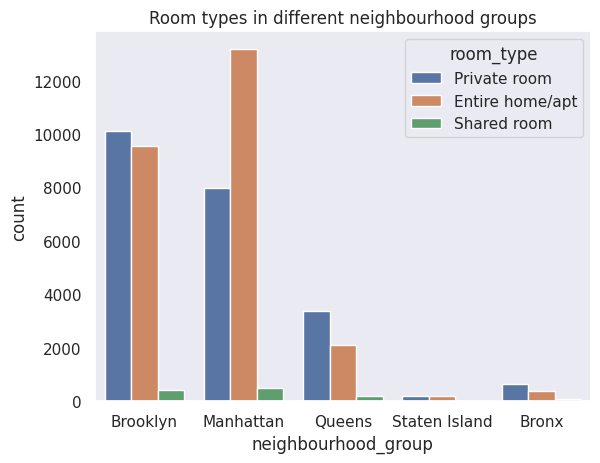

In [42]:
# Room types in different neighbourhood groups
room_type_neighbourhood_groups = df.groupby(['neighbourhood_group', 'room_type'])['room_type'].count()
print('The different room types available in different neighbourhood groups: \n')
room_type_neighbourhood_groups_df = room_type_neighbourhood_groups.reset_index(name='Count')
table = tabulate(room_type_neighbourhood_groups_df, headers=['Neighbourhood Group', 'Room Type', 'Count'], tablefmt='pretty')
print(table)

# Plot the distribution
plt.figure()
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')
plt.title('Room types in different neighbourhood groups')
plt.show()

### **5.7. Types of rooms avalilable around NYC**

The top neighbourhood groups which has the most number of properties listed:

╒════╤═════════════════╤═════════╕
│    │ Room Types      │   Count │
╞════╪═════════════════╪═════════╡
│  0 │ Entire home/apt │   25393 │
├────┼─────────────────┼─────────┤
│  1 │ Private room    │   22306 │
├────┼─────────────────┼─────────┤
│  2 │ Shared room     │    1159 │
╘════╧═════════════════╧═════════╛


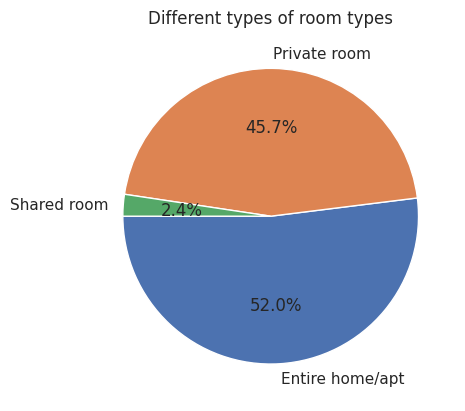

In [43]:
# different room types
bnb_df = df.copy()
different_room_types = bnb_df['room_type'].value_counts()
df = pd.DataFrame({'Room Types': different_room_types.index, 'Count': different_room_types.values})
print('The top neighbourhood groups which has the most number of properties listed:\n')
table = tabulate(df, headers=["Room Types","Count"],tablefmt='fancy_grid')
print(table)

plt.figure()
plt.title('Different types of room types')
plt.pie(bnb_df['room_type'].value_counts(), labels=bnb_df['room_type'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

### **5.8. Hosts provided price for each borough**

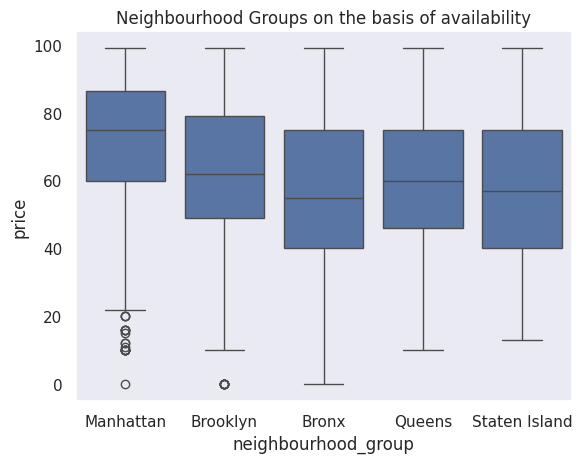

In [44]:
bnb_df_1 = bnb_df.loc[bnb_df['price']<100].sort_values(['price'])

plt.figure()
plt.title('Neighbourhood Groups on the basis of availability')
sns.boxplot(data=bnb_df_1, x='neighbourhood_group', y='price')
plt.show()

1. Why did you choose this specific chart?

   This chart was selected to illustrate the price distribution for each borough, specifically focusing on listings priced between $0 and $100.

2. What insight(s) does the chart provide?

   The chart provides a clear view of how prices are distributed across various NYC boroughs, highlighting differences in affordable accommodation options.

3. Will the insights help drive a positive business impact?

   Yes, these insights can help identify price trends across boroughs, enabling customers to better plan budget-friendly stays based on their preferences. It also supports strategic decisions related to pricing and market targeting.

   Note: Approximately 300 data points, with prices ranging from $100 to $10,000, were excluded during filtering to focus on the lower price range and gain more actionable insights.

### **5.9. Locations/Map of Neighbourhood Groups**

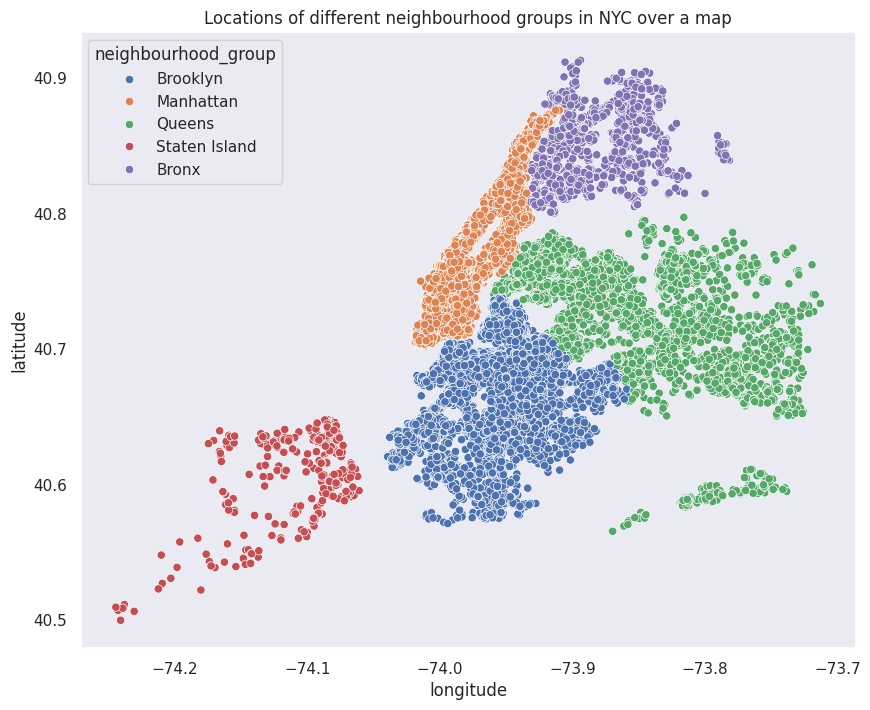

In [45]:
# plot neighbourhood groups on the basis of latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=bnb_df)
plt.title('Locations of different neighbourhood groups in NYC over a map')
plt.show()


### **5.10. Percentage of properties around NYC**

The top neighbourhood groups which has the most number of properties listed:

╒════╤═══════════════════════╤═════════╕
│    │ Neighbourhood Group   │   Count │
╞════╪═══════════════════════╪═════════╡
│  0 │ Manhattan             │   21643 │
├────┼───────────────────────┼─────────┤
│  1 │ Brooklyn              │   20089 │
├────┼───────────────────────┼─────────┤
│  2 │ Queens                │    5664 │
├────┼───────────────────────┼─────────┤
│  3 │ Bronx                 │    1089 │
├────┼───────────────────────┼─────────┤
│  4 │ Staten Island         │     373 │
╘════╧═══════════════════════╧═════════╛


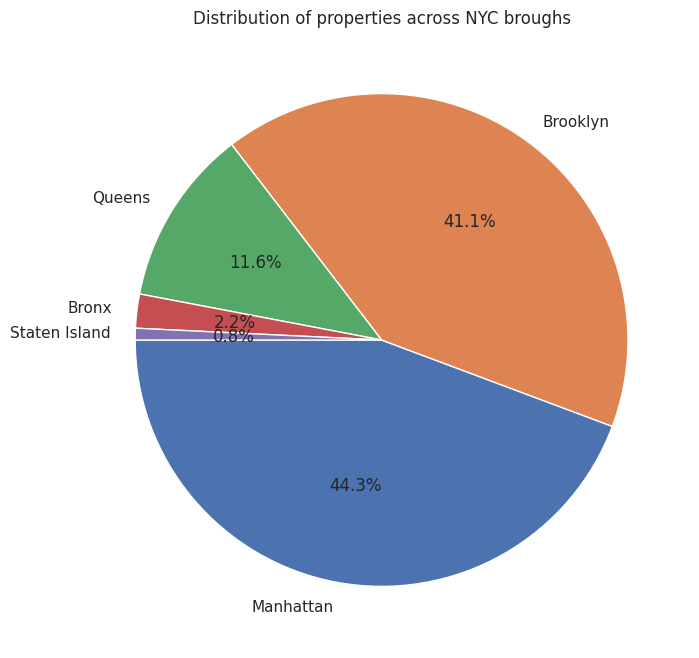

In [46]:
# distribution of the properties around NYC through a pie chart
neighbourhood_groups = bnb_df['neighbourhood_group'].value_counts()
df = pd.DataFrame({'Neighbourhood Group': neighbourhood_groups.index, 'Count': neighbourhood_groups.values})
print('The top neighbourhood groups which has the most number of properties listed:\n')
table = tabulate(df, headers=["Neighbourhood Group","Count"],tablefmt='fancy_grid')
print(table)

plt.figure(figsize=(10, 8))
plt.title('Distribution of properties across NYC broughs')
plt.pie(bnb_df['neighbourhood_group'].value_counts(), labels=bnb_df['neighbourhood_group'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

1. Why did you pick the specific chart?
   
   The scatter plot was chosen to visualize the distribution of properties based on their geographic locations throughout NYC.
   The pie chart offers a clear representation of the proportion of property listings in each borough, showing how they contribute to the overall market.

2. What insight(s) were found from the chart?

   The charts provide insight into the number of properties listed in each borough. As observed, Manhattan has the highest number of listings, followed by Brooklyn, Queens, the Bronx, and Staten Island.

3. Will the gained insights help create a positive business impact?

   Yes, the insights from the pie chart can inform pricing strategies based on demand in less dense areas like Staten Island and the Bronx. Additionally, they can help inform business partners about high-demand areas based on property density.

## **5.11. Which neighbourhoods are the most expensive and the most affordable?**

The most expensive neighbourhoods: 

+----+-------------------+-----------------+
|    | Neighbourhood     |   Average Price |
+====+===================+=================+
|  0 | Fort Wadsworth    |         800     |
+----+-------------------+-----------------+
|  1 | Woodrow           |         700     |
+----+-------------------+-----------------+
|  2 | Tribeca           |         490.638 |
+----+-------------------+-----------------+
|  3 | Sea Gate          |         487.857 |
+----+-------------------+-----------------+
|  4 | Riverdale         |         442.091 |
+----+-------------------+-----------------+
|  5 | Prince's Bay      |         409.5   |
+----+-------------------+-----------------+
|  6 | Battery Park City |         367.087 |
+----+-------------------+-----------------+
|  7 | Flatiron District |         341.925 |
+----+-------------------+-----------------+
|  8 | Randall Manor     |         336     |
+----+-------------------+-----------------+
|  9 | NoHo       

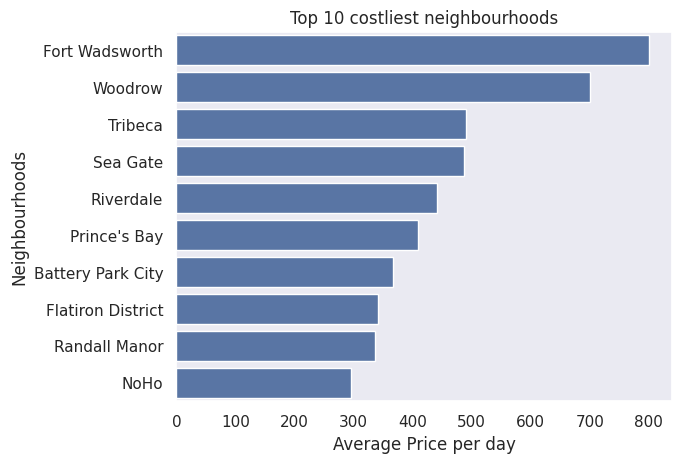

In [47]:
# find the top 10 costly neighbourhoods in NYC
high_priced_neighbourhoods = bnb_df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]
print('The most expensive neighbourhoods: \n')
high_priced_neighbourhoods_df = high_priced_neighbourhoods.reset_index(name='Average Price')
table = tabulate(high_priced_neighbourhoods_df, headers = ['Neighbourhood','Average Price'],tablefmt='grid')
print(table)

# plot the costliest neighbourhoods
sns.barplot(y=high_priced_neighbourhoods.index,x=high_priced_neighbourhoods.values)
plt.ylabel('Neighbourhoods')
plt.xlabel('Average Price per day')
plt.title('Top 10 costliest neighbourhoods')
plt.show()

The most affordable neighbourhoods: 

+----+-----------------+-----------------+
|    | Neighbourhood   |   Average Price |
+====+=================+=================+
|  0 | Bull's Head     |         47.3333 |
+----+-----------------+-----------------+
|  1 | Hunts Point     |         50.5    |
+----+-----------------+-----------------+
|  2 | Tremont         |         51.5455 |
+----+-----------------+-----------------+
|  3 | Soundview       |         53.4667 |
+----+-----------------+-----------------+
|  4 | New Dorp        |         57      |
+----+-----------------+-----------------+
|  5 | Bronxdale       |         57.1053 |
+----+-----------------+-----------------+
|  6 | New Dorp Beach  |         57.4    |
+----+-----------------+-----------------+
|  7 | Grant City      |         57.6667 |
+----+-----------------+-----------------+
|  8 | Concord         |         58.1923 |
+----+-----------------+-----------------+
|  9 | Mount Eden      |         58.5    |
+----+----------

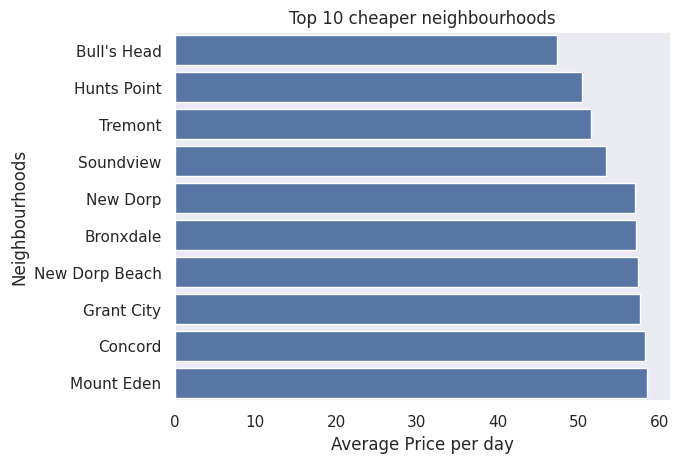

In [48]:
# find the top 10 cheaper neighbourhoods in NYC
low_priced_neighbourhoods = bnb_df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10]
print('The most affordable neighbourhoods: \n')
low_priced_neighbourhoods_df = low_priced_neighbourhoods.reset_index(name='Average Price')
table = tabulate(low_priced_neighbourhoods_df, headers = ['Neighbourhood','Average Price'],tablefmt='grid')
print(table)

# plot the cheaper neighbourhoods
sns.barplot(y=low_priced_neighbourhoods.index,x=low_priced_neighbourhoods.values)
plt.ylabel('Neighbourhoods')
plt.xlabel('Average Price per day')
plt.title('Top 10 cheaper neighbourhoods')
plt.show()

### **5.12. Hosts who are providing more stay for the paid price**

In [49]:
df = bnb_df.sort_values('minimum_nights',ascending=False)[:20]
df[['host_id','host_name','neighbourhood_group','neighbourhood','room_type','minimum_nights','price']]

,host_id,host_name,neighbourhood_group,neighbourhood,room_type,minimum_nights,price
5767,17550546,Genevieve,Manhattan,Greenwich Village,Entire home/apt,1250,180
38664,200401254,Meg,Manhattan,Greenwich Village,Shared room,999,110
13404,2697686,Glenn H.,Manhattan,Harlem,Entire home/apt,999,99
26341,151084261,Angie,Brooklyn,Williamsburg,Private room,999,79
7355,3680008,Aliya,Queens,Long Island City,Entire home/apt,500,134
11193,8996336,Laura,Brooklyn,Crown Heights,Private room,500,50
47620,82674375,Meg,Brooklyn,Williamsburg,Entire home/apt,500,140
14285,2228137,Amanda,Brooklyn,Kensington,Private room,500,45
8014,10720264,John,Manhattan,Harlem,Entire home/apt,500,75
10829,43945071,Shining,Queens,Long Island City,Entire home/apt,480,199


# **5.13. Neighbourhoods which offer more stay**

In [50]:
top_10_neighbourhoods_min_nights = bnb_df.groupby(['neighbourhood']).agg({'minimum_nights':'mean','price':'mean'}).sort_values('minimum_nights',ascending=False)[:10]
print('The neighbourhoods preferred for longer stays: \n')
top_10_neighbourhoods_min_nights

The neighbourhoods preferred for longer stays: 



,minimum_nights,price
neighbourhood,,
Spuyten Duyvil,48.250000,154.750000
North Riverdale,41.400000,79.900000
Olinville,23.500000,64.000000
Vinegar Hill,18.352941,187.176471
"Bay Terrace, Staten Island",16.500000,102.500000
Battery Park City,16.275362,367.086957
Mount Hope,15.950000,77.500000
Greenwich Village,15.877238,263.503836
Murray Hill,15.589691,220.958763


* Why did you pick the specific chart?

  It might be more effective to present the data in a table format for better clarity and comparison.

* What insights are found from the chart?

  The host Genevieve offers better value in terms of longer stays for the price paid (Entire home/apt).
  The Spuyten Duyvil neighborhood also provides longer stays relative to the cost.

* Will the gained insights help create a positive business impact?

  Yes, these insights can support better recommendations. For example, we can suggest that customers looking for longer stays at better prices consider booking entire homes/apartments

## **6. Business Objective**

### **What do you suggest the client to achieve Business Objective ?**

The goal of the Airbnb EDA is to gain actionable insights from Airbnb listings data to help improve business decisions for hosts, the platform, and potential investors. The analysis aims to:

**1**. **Understand Pricing Dynamics**

   Identify factors (e.g. location, amenities, reviews) that affect listing prices to help set competitive and profitable rates.

**2. Analyze Demand & Availability**

   Explore seasonal trends, booking patterns, and listing availability to guide marketing and inventory strategies.

**3. Evaluate Customer Preferences**

   Discover what features or types of listings attract more guests and lead to better reviews.

**4. Support Host Performance**

   Help hosts optimize their listings to increase occupancy, enhance guest satisfaction, and improve revenue.

**5. Spot Market Opportunities**

   Identify high-performing areas or underserved markets for strategic expansion or investment.

# **Airbnb Data Insights and Recommendations**

### **1. Price Analysis and Recommendations**  
This analysis is valuable for both Airbnb guests and property owners to understand pricing trends and adjust their rates accordingly.  
- Hosts in higher-priced neighborhoods can be advised to emphasize the unique benefits and experiences they offer.  
- Hosts in more affordable areas can be encouraged to target budget-conscious travelers by highlighting cost-effective options.

### **2. Host Performance and Market Insights**  
These insights are useful for Airbnb and other stakeholders interested in evaluating host performance.  
- Identifying top-performing hosts can help in recognizing best practices and encouraging high standards across the platform.

### **3. Borough-Level Analysis**  
This information benefits travelers seeking less complicated or more budget-friendly options.  
- Recommendations can be made to help guests find the most affordable metropolitan areas to stay in, potentially reducing costs while maintaining comfort and accessibility.

### **4. Room Characteristics and Area Group Analysis**  
This analysis provides insights into how different room types are distributed across various area groups.  
- It helps guests make informed decisions based on their preferences.  
- Tailored recommendations can be offered for commonly available room types in each community group.

### **5. Geospatial Analysis**  
Geospatial analysis helps visitors visualize the distribution of neighborhood clusters across NYC.  
- Based on the data, it’s recommended to increase property listings in underrepresented areas like Staten Island and the Bronx.


# **Conclusion**

* The exploratory data analysis (EDA) of the given Airbnb dataset has provided valuable insights into pricing dynamics and the popularity of different neighborhoods across New York City.

* Our analysis shows that NYC offers accommodation options suitable for both budget travelers and luxury seekers. Neighborhood analysis revealed which areas are most popular, along with the room types predominantly available in those locations.

* The room type analysis highlighted which types are widely distributed and which are more limited, helping inform supply-side strategies. Additionally, the analysis of minimum night stays has identified areas ideal for short-term, medium-term, and long-term stays.

* These findings empower Airbnb to make better recommendations to customers both now and in the future. We've explored and visualized key features of the dataset, uncovering insights that can significantly aid Airbnb in strategic decision-making to attract more tourists and optimize experiences for both guests and hosts.

* Ultimately, these insights aim to create a win-win scenario for customers, hosts, and the company alike.
